#ECE 595 Machine Learning II
#Project 1: CLDNN - Solution Code

In [2]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import _pickle as cPickle

Using TensorFlow backend.


#Part 0: Importing and normalizing data

In [3]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

4423680/4422102 [==============================] - 0s 0us/step


#Part 1: Plotting cross entropy

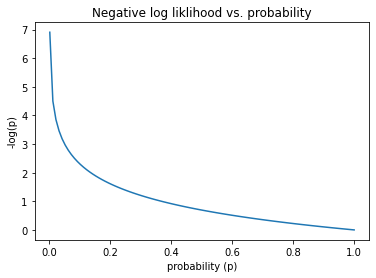

In [4]:
#Show cross-entropy loss function
x = np.linspace(0.001, 1.00, 100)
y = -np.log(x)
plt.figure(0)
plt.plot(x, y)
plt.ylabel('-log(p)')
plt.xlabel('probability (p)')
plt.title("Negative log liklihood vs. probability")
plt.show()

Answer the following questions: 


1.  How is the the negative log-likelihood of p affected when p is small? How about when p is large? 

  ANS: When p is small, the negative log-likelihood is large and when p is large, the negative log-liklihood is small. 
  
  

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space? 

  ANS: When the outputs are interpreted as probability, the model will indicate a low error when a correct classification is made with high probability. However, when the probability of the correct classification is low, the cost should be high indicating that the model has a high error. The negative log-liklihood serves as a good objective function because it produces a high cost at low probability which indicates the need for further minimization whereas, at high probability, it produces a low cost indicating a better fit model. 



#Part 2: Overfit CNN

In [ ]:
#Create and train model architecture
def CNN_overfit():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()
    model.add(Conv2D(256, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, kernel_size=3, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(10, activation="tanh"))
    return model

#Compile and train the model
CNN_overfit = CNN_overfit()
CNN_overfit.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history_overfit = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=70, batch_size=1000, shuffle=True)
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/70
60000/60000 [==============================] - 6s 99us/step - loss: 0.0491 - accuracy: 0.6824 - val_loss: 0.0323 - val_accuracy: 0.7968
Epoch 2/70
60000/60000 [==============================] - 6s 95us/step - loss: 0.0276 - accuracy: 0.8350 - val_loss: 0.0248 - val_accuracy: 0.8523
Epoch 3/70
60000/60000 [==============================] - 6s 95us/step - loss: 0.0222 - accuracy: 0.8693 - val_loss: 0.0215 - val_accuracy: 0.8682
Epoch 4/70
60000/60000 [==============================] - 6s 96us/step - loss: 0.0193 - accuracy: 0.8847 - val_loss: 0.0194 - val_accuracy: 0.8793
Epoch 5/70
60000/60000 [==============================] - 6s 96us/step - loss: 0.0174 - accuracy: 0.8937 - val_loss: 0.0185 - val_accuracy: 0.8844
Epoch 6/70
60000/60000 [==============================] - 6s 96us/step - loss: 0.0161 - accuracy: 0.9009 - val_loss: 0.0172 - val_accuracy: 0.8915
Epoch 7/70
60000/60000 [==============================] - 6s 96us/st

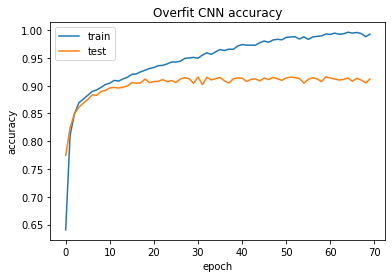

In [ ]:
#Plot accuracy vs epoch
plt.plot(history_overfit.history['accuracy'])
plt.plot(history_overfit.history['val_accuracy'])
plt.title('Overfit CNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


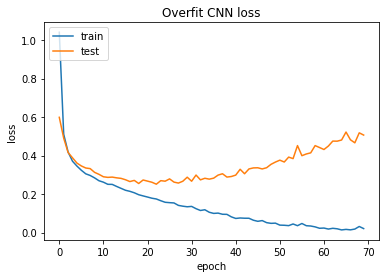

In [ ]:
#Plot loss vs epoch
plt.plot(history_overfit.history['loss'])
plt.plot(history_overfit.history['val_loss'])
plt.title('Overfit CNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: Should be consistent with plot

2.   What does the loss of the testing set go to? 

  ANS: Should be consistent with plot
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS: Model is fit to specifically minimize the error when classifying the training set with no regard to the testing set

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: The model is specifically fit to the training data with no regard for generalization or overfitting to the training set. This can be avoided in a variety of ways: dropout, cross-validation, larger training set, fewer feature maps, etc. 



#Part 3: Dropout on input layer

In [5]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

    model.add(Dropout(0.3))
    model.add(Conv2D(256, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, kernel_size=3, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dense(10, activation="softmax"))
    return model

#Compile and train the model
CNN_dropout_in = CNN_dropout_in()
CNN_dropout_in.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_in = CNN_dropout_in.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=70, batch_size=1000, shuffle=True)
scores_dropout_in = CNN_dropout_in.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_in[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/70
60000/60000 [==============================] - 10s 169us/step - loss: 0.9727 - accuracy: 0.6360 - val_loss: 0.6957 - val_accuracy: 0.7459
Epoch 2/70
60000/60000 [==============================] - 3s 56us/step - loss: 0.5653 - accuracy: 0.7868 - val_loss: 0.5758 - val_accuracy: 0.7905
Epoch 3/70
60000/60000 [==============================] - 3s 56us/step - loss: 0.4945 - accuracy: 0.8157 - val_loss: 0.5275 - val_accuracy: 0.8133
Epoch 4/70
60000/60000 [==============================] - 3s 56us/step - loss: 0.4520 - accuracy: 0.8339 - val_loss: 0.5017 - val_accuracy: 0.8257
Epoch 5/70
60000/60000 [==============================] - 3s 55us/step - loss: 0.4164 - accuracy: 0.8476 - val_loss: 0.4818 - val_accuracy: 0.8351
Epoch 6/70
60000/60000 [==============================] - 3s 56us/step - loss: 0.3941 - accuracy: 0.8551 - val_loss: 0.4517 - val_accuracy: 0.8467
Epoch 7/70
60000/60000 [==============================] - 3s 56us/

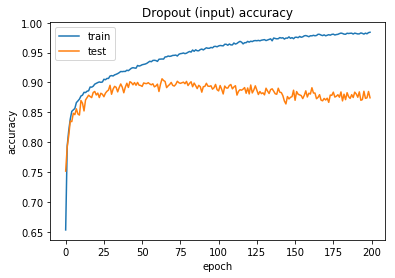

In [ ]:
#Plot accuracy vs epoch
plt.plot(history_dropout_in.history['accuracy'])
plt.plot(history_dropout_in.history['val_accuracy'])
plt.title('Dropout (input) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

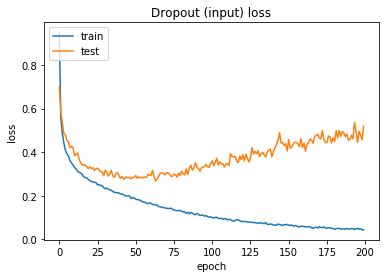

In [ ]:
#Plot loss vs epoch
plt.plot(history_dropout_in.history['loss'])
plt.plot(history_dropout_in.history['val_loss'])
plt.title('Dropout (input) loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: Should be consistent with plot
  
2.   What does the loss of the testing set go to? 

  ANS: Should be consistent with plot

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS: The dropout is not applied appropriately, so the CNN still results in over-fitting to the training data thus leading to a low training data loss and a high testing data loss. Since dropout is applied to the input, each sample results in dropping out random values which does not help during training. If the values were discarded in a systematic way (such as dimensionality reduction using PCA or sparsity using the greatest values in each sample), the CNN may generalize better but randomly dropping out data values does not help aliviate overfitting 
 



#Part 4-I: Dropout on Hidden Layers

In [ ]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    model.add(Conv2D(256, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, kernel_size=3, activation="relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation="softmax"))
    return model

#Compile and train the model
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 11s 190us/step - loss: 1.0160 - acc: 0.6262 - val_loss: 0.6719 - val_acc: 0.7909
Epoch 2/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.5569 - acc: 0.7930 - val_loss: 0.5338 - val_acc: 0.8338
Epoch 3/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.4638 - acc: 0.8310 - val_loss: 0.4708 - val_acc: 0.8565
Epoch 4/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.4143 - acc: 0.8521 - val_loss: 0.4219 - val_acc: 0.8676
Epoch 5/200
60000/60000 [==============================] - 11s 183us/step - loss: 0.3796 - acc: 0.8633 - val_loss: 0.4017 - val_acc: 0.8691
Epoch 6/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.3569 - acc: 0.8733 - val_loss: 0.3749 - val_acc: 0.8843
Epoch 7/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.3419 - acc: 0.8771 - val_l

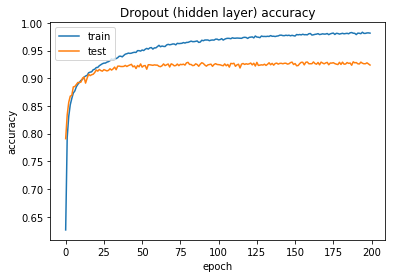

In [ ]:
#Plot accuracy vs epoch
plt.plot(history_dropout_hidden.history['acc'])
plt.plot(history_dropout_hidden.history['val_acc'])
plt.title('Dropout (hidden layer) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

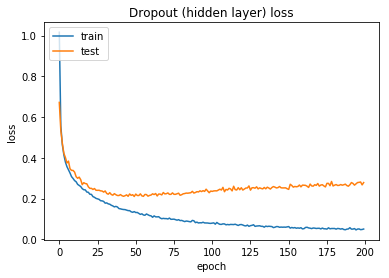

In [ ]:
#Plot loss vs epoch
plt.plot(history_dropout_hidden.history['loss'])
plt.plot(history_dropout_hidden.history['val_loss'])
plt.title('Dropout (hidden layer) loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: Should be consistent with plot
  
2.   What does the loss of the testing set go to? 

  ANS: Should be consistent with plot

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: Dropout was appropriately applied to the hidden layers aliviating the CNN from depending on certain paprameters which, in turn, led to better generalization of the training data. This is evident from the comparable loss between the training and testing set. 
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: Difference in accuracy should be small (a numerical value should be given from the plots). The model is a good fit for the data (especially in comparions to the other arcitectures used) but it could be made better. 



#Part 4-II [Sub-Question 5]: Dropout on Input and Hidden Layers

In [ ]:
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    model.add(Dropout(0.3))
    model.add(Conv2D(256, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, kernel_size=3, activation="relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation="softmax"))
    return model


#Compile and train the model
CNN_dropout_both = CNN_dropout_both()
CNN_dropout_both.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_both = CNN_dropout_both.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_both = CNN_dropout_both.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_both[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 192us/step - loss: 1.0845 - acc: 0.5961 - val_loss: 0.8617 - val_acc: 0.7552
Epoch 2/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.6303 - acc: 0.7606 - val_loss: 0.7145 - val_acc: 0.7961
Epoch 3/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.5566 - acc: 0.7901 - val_loss: 0.6580 - val_acc: 0.8152
Epoch 4/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.5120 - acc: 0.8076 - val_loss: 0.6029 - val_acc: 0.8253
Epoch 5/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.4792 - acc: 0.8220 - val_loss: 0.5828 - val_acc: 0.8437
Epoch 6/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.4486 - acc: 0.8342 - val_loss: 0.5215 - val_acc: 0.8516
Epoch 7/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.4322 - acc: 0.8399 - val_l

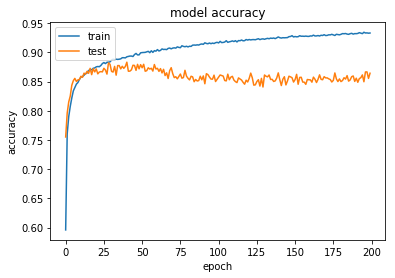

In [ ]:
#Plot accuracy vs epoch
plt.plot(history_dropout_both.history['acc'])
plt.plot(history_dropout_both.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

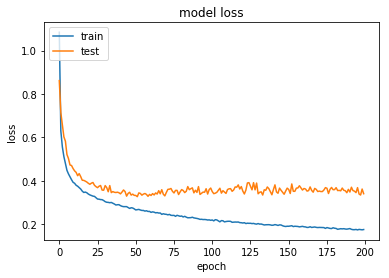

In [ ]:
#Plot loss vs epoch
plt.plot(history_dropout_both.history['loss'])
plt.plot(history_dropout_both.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: Should be consistent with plot
  
2.   What does the loss of the testing set go to? 

  ANS: Should be consistent with plot
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: Difference in accuracy should be larger than difference calculated in Part 4 (a numerical value should be given from the plots). 
  
4.   Compare results in 4 with results in 5. Comment on robustness and accuracy. 

  ANS: Using dropout in the hidden layers as well as in the input layer decreased the robustness of the model because the dropout was still applied incorrectly to the input layer (as described in Part 3, ANS 3). 

#Part 5 : Activation Functions

In [8]:
#Create and train model architecture
def CNN_dropout_both_act():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    model.add(Dropout(0.3))
    model.add(Conv2D(256, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, kernel_size=3, activation="relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation="sigmoid"))   # use 'sigmoid' for point 1 and use 'tanh' for point 2
    return model


#Compile and train the model
CNN_dropout_both_act = CNN_dropout_both_act()
CNN_dropout_both_act.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_both_act = CNN_dropout_both_act.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_both_act = CNN_dropout_both_act.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_both_act[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 6s 101us/step - loss: 1.2548 - accuracy: 0.5214 - val_loss: 0.9882 - val_accuracy: 0.7180
Epoch 2/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.7180 - accuracy: 0.7233 - val_loss: 0.7804 - val_accuracy: 0.7610
Epoch 3/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.6172 - accuracy: 0.7665 - val_loss: 0.7187 - val_accuracy: 0.7896
Epoch 4/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.5634 - accuracy: 0.7888 - val_loss: 0.6725 - val_accuracy: 0.8090
Epoch 5/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.5249 - accuracy: 0.8049 - val_loss: 0.6350 - val_accuracy: 0.8217
Epoch 6/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.4881 - accuracy: 0.8206 - val_loss: 0.5969 - val_accuracy: 0.8411
Epoch 7/200
60000/60000 [==============================] - 6s

In [ ]:
#Plot accuracy vs epoch
plt.plot(history_dropout_both_act.history['acc'])
plt.plot(history_dropout_both_act.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Plot loss vs epoch
plt.plot(history_dropout_both_act.history['loss'])
plt.plot(history_dropout_both_act.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions: 

1-c.   Compare the above results with softmax results (with point 5 results of Part 4-II)

  ANS: Should be consistant with the plots. 
  
2-a.   Does ‘tanh’ as output activation work with Cross-entropy loss?

  ANS: No. Either the code gives error once training starts OR training loss  does not decrease.

2-b.   Give a reason why tanh is not recommended with cross entropy loss?

  ANS: We know that if an expoential activation function (like sigmoid and tanh) is used at the output layer, then cross-entropy loss is a suitable loss function because it prevents gradient saturation at the output layer. Along with that we need to take care of the range of values being passed to the cross-entropy loss. The cross entropy expects value between 0 to 1 and tanh ranges from -1 to 1, therefore at any point when the value of tanh goes to negative, the cross-entropy loss is numerically/computationally unstable.

2-c.   Give a reason why sigmoid does not cause problem as tanh with Cross entropy loss?

  ANS: Contrary to tanh, sigmoid has value between 0 to 1, which is compatible with cross-entropy loss. So the training works, but may not produce as good results as softmax.


#Part 6: Creating a CLDNN

In [ ]:
#Download RML 2016.10b dataset and untar file
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'))
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

--2019-08-09 15:52:44--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  15.8MB/s    in 76s     

2019-08-09 15:54:00 (15.6 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [ ]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    model.add(Conv2D(256, (1, 3), activation="relu", input_shape=(2, 128, 1)))
    model.add(Dropout(0.20))
    model.add(Conv2D(256, (2, 3), activation="relu"))
    model.add(Conv2D(80, (1, 3), activation="relu"))
    model.add(Dropout(.20))
    model.add(Conv2D(80, (1, 3), activation="relu"))
    model.add(Reshape((16, 600)))
    model.add(LSTM(50))
    model.add(Dense(128, activation="relu", kernel_initializer="normal"))
    model.add(Dense(10, activation="softmax", kernel_initializer="normal"))
    return model

#Compile and train the model
cldnn = cldnn()
print(cldnn.model.summary())
cldnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cldnn_history = cldnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=1024, shuffle=True)
scores = cldnn.evaluate(X_test, Y_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

/usr/local/lib/python2.7/dist-packages/keras/engine/sequential.py:110: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 2, 126, 256)       1024      
_________________________________________________________________
dropout_11 (Dropout)         (None, 2, 126, 256)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 124, 256)       393472    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 122, 80)        61520     
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 122, 80)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 120, 80)        19280     
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 600)           0         
__________

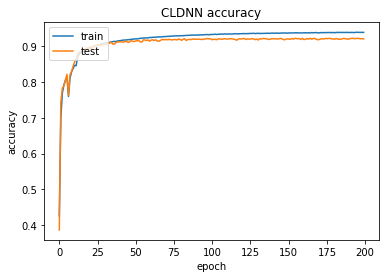

In [ ]:
#Plot accuracy vs epoch
plt.plot(cldnn_history.history['acc'])
plt.plot(cldnn_history.history['val_acc'])
plt.title('CLDNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

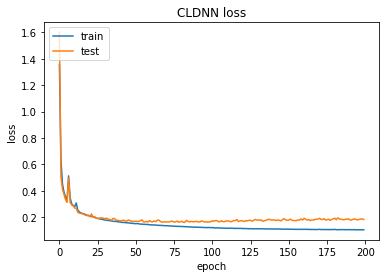

In [ ]:
#Plot loss vs epoch
plt.plot(cldnn_history.history['loss'])
plt.plot(cldnn_history.history['val_loss'])
plt.title('CLDNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: Yes, it is able to achieve state-of-the-art accuracy at over 90%. However, the model could be made more robust since approximately 8% of the samples were still misclassified. 

2.   Give two ways to improve the robustness of the model.

  ANS: More training data, fewer hidden layer parameters, cross-validation, etc. 
